## Лабораторная Работа номер 2:  Приближённое  решение уравнения  вида  f(x) = 0  итерационными  методами:  простой итерации, секущих и касательных (комбинированный метод) 
### Вариант 19: 2*sin(x + 0.5) = 1.5 - x

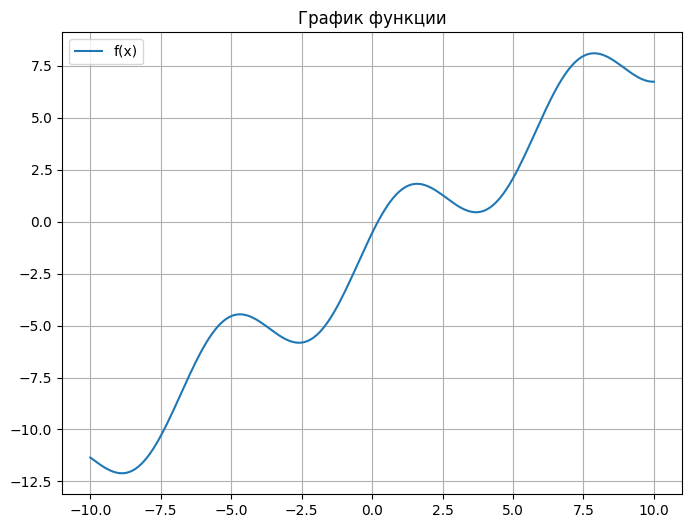

Введите интервал и точность:


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Функция f(x)
def f(x):
    return 2 * np.sin(x + 0.5) - 1.5 + x

# Производная функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Проверка условия сходимости метода простой итерации
def check_convergence_condition(a, b):
    df_abs_max = np.max(np.abs(df(np.linspace(a, b, 500))))
    if df_abs_max >= 1:
        print(f"ПРЕДУПРЕЖДЕНИЕ: Условие сходимости не выполнено на интервале [{a}, {b}], метод может расходиться.")
        return False
    else:
        print(f"Условие сходимости выполнено на интервале [{a}, {b}].")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=10000):
    # График функции на широком диапазоне
    x_values = np.linspace(-10, 10, 200)
    y_values = f(x_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='f(x)')
    plt.grid(True)
    plt.title('График функции')
    plt.legend()
    plt.show()
    
    # Запрашиваем начальные значения и точность
    print("Введите интервал и точность:")
    a = float(input("Начало интервала: "))
    b = float(input("Конец интервала: "))
    tol = float(input("Точность (например, 0.0001): "))
    
    # Проверяем условие сходимости
    convergence_check = check_convergence_condition(a, b)
    
    # Графики функции и производной на интервале [a, b]
    x_values_interval = np.linspace(a, b, 200)
    y_values_f = f(x_values_interval)
    y_values_df = df(x_values_interval)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values_interval, y_values_f, label='f(x)')
    plt.grid(True)
    plt.title(f'График функции на интервале [{a}, {b}]')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values_interval, y_values_df, label="f'(x)")
    plt.axhline(y=1, color='r', linestyle='--', label='y=1')
    plt.axhline(y=-1, color='r', linestyle='--', label='y=-1')
    plt.grid(True)
    plt.title(f'График производной на интервале [{a}, {b}]')
    plt.legend()
    plt.show()
    
    # Алгоритм простой итерации
    iter_count = 0
    x_n = (a + b) / 2  # Начальное приближение
    x_n_plus_1 = None
    epsilon = int(-np.log10(tol)) + 1  # Количество знаков после запятой для вывода
    
    print(f"{'Шаг':>10}{'Xn':>20}{'X(n+1)':>20}{'|Xn - X(n+1)|':>20}{'Сравнение с точностью':>20}")
    while True:
        x_n_plus_1 = x_n - f(x_n) / df(x_n)  # Формула Ньютона-Рафсона
        
        diff = abs(x_n - x_n_plus_1)
        comparison = 'меньше' if diff < tol else 'больше'
        
        print(f"{iter_count:>10d}{x_n:>20.{epsilon}f}{x_n_plus_1:>20.{epsilon}f}{diff:>20.{epsilon}f}{comparison:>20}")
        
        if diff < tol or iter_count >= max_iter:
            break
            
        x_n = x_n_plus_1
        iter_count += 1
    
    print(f"\nРешение уравнения: X = {x_n_plus_1:.{epsilon}f} с точностью {tol:.{epsilon -1}f}")

simple_iteration(-10, 10, 0.01)

In [16]:
import numpy as np

# Определяем новую функцию g(x) для метода простой итерации
def g(x):
    return np.arcsin((1.5 - x) / 2) - 0.5

# Определяем производную функции g(x)
def g_derivative(x):
    return 1 / (2 * np.sqrt(1 - ((1.5 - x) / 2)**2))

# Проверка условия сходимости
def check_convergence(a, b):
    """
    Проверяет условие сходимости метода простой итерации: |g'(x)| < 1.

    :param a: Начало интервала
    :param b: Конец интервала
    :return: True, если условие сходимости выполнено, иначе False
    """
    # Создаем массив значений x в интервале [a, b]
    x_values = np.linspace(a, b, 500)
    # Вычисляем значения производной |g'(x)| для всех x в интервале
    derivative_values = np.abs(g_derivative(x_values))
    max_derivative = np.max(derivative_values)  # Находим максимальное значение |g'(x)|

    if max_derivative >= 1:
        print("Проверка на условие сходимости не пройдена.")
        print(f"Максимальное значение |g'(x)| в интервале [{a}, {b}] равно {max_derivative:.4f}.")
        print("Условие сходимости метода простой итерации требует, чтобы |g'(x)| < 1.")
        print("Поскольку |g'(x)| >= 1, метод может расходиться.")
        print("Рекомендуется использовать другой метод, например, метод половинного деления или метод Ньютона.")
        return False
    else:
        print("Проверка на условие сходимости пройдена.")
        return True

# Метод простой итерации
def simple_iteration(a, b, tol, max_iter=1000):
    """
    Находит корень уравнения методом простой итерации.

    :param a: Начало интервала
    :param b: Конец интервала
    :param tol: Точность
    :param max_iter: Максимальное количество итераций
    :return: Приближенное значение корня
    """
    # Проверка условия сходимости
    if not check_convergence(a, b):
        return None

    # Выбираем начальное приближение как середину интервала
    x_prev = (a + b) / 2

    # Определяем количество знаков после запятой для форматирования
    precision_digits = abs(int(np.floor(np.log10(tol))))

    print(f"{'Итерация':<10}{'x_prev':<15}{'x_next':<15}{'|x_next - x_prev|':<20}")
    print("-" * 65)

    iteration = 0
    while iteration < max_iter:
        x_next = g(x_prev)  # Вычисляем следующее приближение
        diff = abs(x_next - x_prev)  # Разница между текущим и предыдущим значением

        # Выводим отчет по текущей итерации
        print(f"{iteration:<10}{x_prev:<15.{precision_digits}f}{x_next:<15.{precision_digits}f}{diff:<20.{precision_digits}f}")

        if diff < tol:  # Проверяем условие выхода
            print(f"\nКорень найден: {x_next:.{precision_digits}f}")
            return x_next

        x_prev = x_next  # Обновляем предыдущее значение
        iteration += 1

    print("\nМетод не сошелся за максимальное количество итераций.")
    return None

# Ввод данных пользователем
try:
    a = float(input("Введите начало интервала (a): "))
    b = float(input("Введите конец интервала (b): "))
    tol = float(input("Введите точность (например, 0.0001): "))

    # Проверка, что точность положительна
    if tol <= 0:
        raise ValueError("Точность должна быть положительным числом.")

    # Находим корень
    root = simple_iteration(a, b, tol)
except ValueError as e:
    print(f"Ошибка: {e}")

Проверка на условие сходимости пройдена.
Итерация  x_prev         x_next         |x_next - x_prev|   
-----------------------------------------------------------------
0         -0.500         1.071          1.571               
1         1.071          -0.284         1.355               
2         -0.284         0.601          0.885               
3         0.601          -0.034         0.635               
4         -0.034         0.374          0.408               
5         0.374          0.098          0.276               
6         0.098          0.277          0.179               
7         0.277          0.158          0.119               
8         0.158          0.236          0.077               
9         0.236          0.184          0.051               
10        0.184          0.218          0.033               
11        0.218          0.196          0.022               
12        0.196          0.210          0.014               
13        0.210          0.201         

C:\Users\DxDyBoss\AppData\Local\Temp\ipykernel_11576\2783907285.py:9: RuntimeWarning: invalid value encountered in sqrt
  return 1 / (2 * np.sqrt(1 - ((1.5 - x) / 2)**2))


## Метод хорд и касательных (комбинированный)

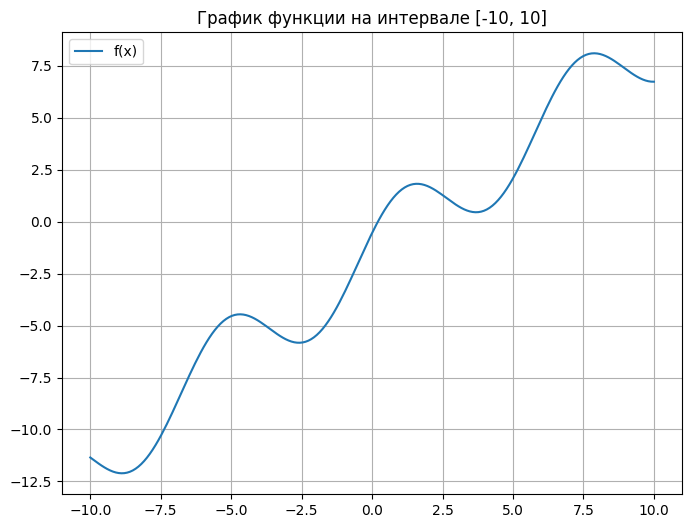


Введите границы интервала и точность для комбинированного метода хорд и касательных:


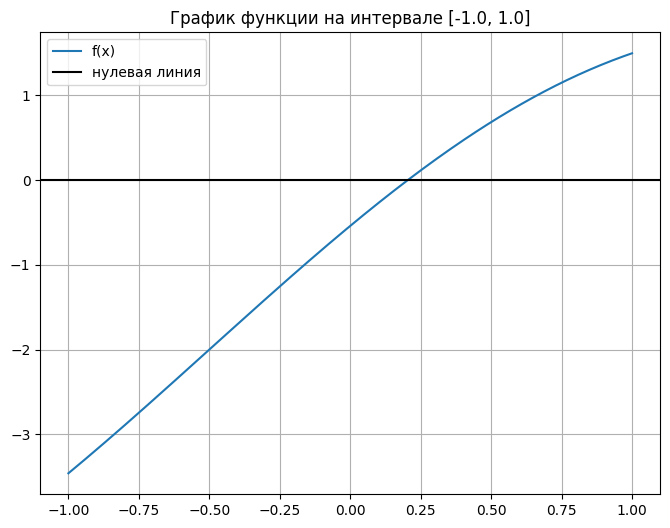

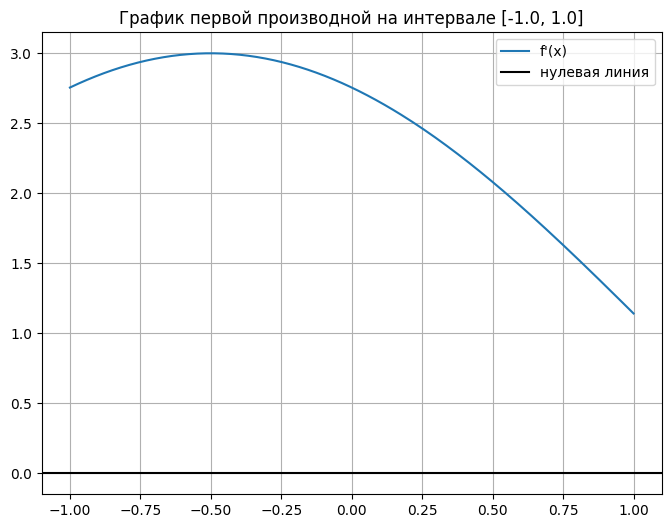

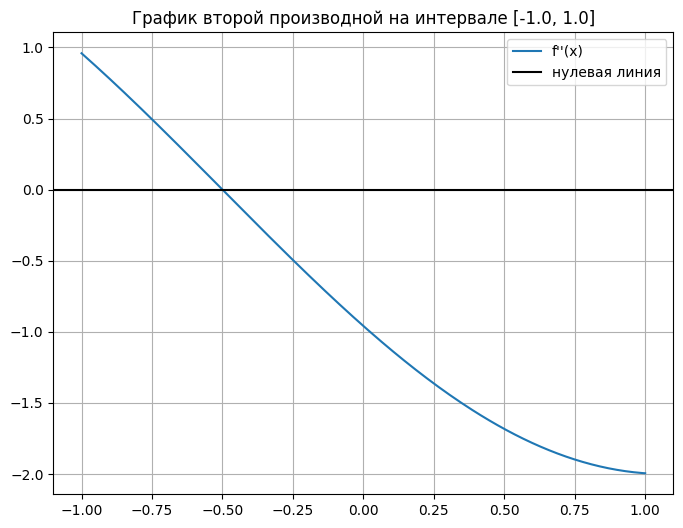


Решая уравнение комбинированным методом хорд и касательных...
       Шаг                  an              a(n+1)         |an-a(n+1)|            Точность                  bn              b(n+1)         |bn-b(n+1)|            Точность
         0             -1.0000              0.2052              1.2052              больше              1.0000              0.1925              0.8075              больше
         1              0.2052              0.2046              0.0007              меньше              0.1925              0.2045              0.0121              больше
         2              0.2046              0.2046              0.0000              меньше              0.2045              0.2046              0.0000              меньше

Решение уравнения: X = 0.2046 с точностью 0.0010


In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Функция f(x)
def f(x):
    return 2 * np.sin(x + 0.5) - 1.5 + x

# Первая производная функции f'(x)
def df(x):
    return 2 * np.cos(x + 0.5) + 1

# Вторая производная функции f''(x)
def ddf(x):
    return -2 * np.sin(x + 0.5)

# Комбинированный метод хорд и касательных
def combined_chord_tangent_method(a, b, tol, max_iter=100):
    # Определение количества знаков после запятой для вывода
    precision = int(-np.log10(tol)) + 1
    
    # Начальное приближение по методу хорд
    x_n = b - (f(b) * (a - b)) / (f(a) - f(b))
    iter_count = 0
    
    print(f"{'Шаг':>10}{'an':>20}{'a(n+1)':>20}{'|an-a(n+1)|':>20}{'Точность':>20}"
          f"{'bn':>20}{'b(n+1)':>20}{'|bn-b(n+1)|':>20}{'Точность':>20}")
    
    while True:
        # Применение метода касательных (Ньютона)
        x_n_plus_1 = x_n - f(x_n) / df(x_n)
        
        # Расчет новых границ интервала
        a_new = x_n_plus_1 - (f(x_n_plus_1) * (x_n - x_n_plus_1)) / (f(x_n) - f(x_n_plus_1))
        b_new = x_n_plus_1
        
        # Разница и сравнение с точностью
        da_diff = abs(a_new - a)
        db_diff = abs(b_new - b)
        da_comparison = 'меньше' if da_diff < tol else 'больше'
        db_comparison = 'меньше' if db_diff < tol else 'больше'
        
        # Вывод значений с нужной точностью
        print(f"{iter_count:>10d}{a:>20.{precision}f}{a_new:>20.{precision}f}{da_diff:>20.{precision}f}{da_comparison:>20}"
              f"{b:>20.{precision}f}{b_new:>20.{precision}f}{db_diff:>20.{precision}f}{db_comparison:>20}")
        
        if da_diff < tol and db_diff < tol:
            break
            
        a = a_new
        b = b_new
        x_n = x_n_plus_1
        iter_count += 1
    
    # Финальный вывод с соблюдением точности
    final_root = (a + b) / 2
    print(f"\nРешение уравнения: X = {final_root:.{precision}f} с точностью {tol:.{precision}f}")

# Основная программа
if __name__ == "__main__":
    # Отображение графика функции на интервале от -10 до 10
    x_values = np.linspace(-10, 10, 200)
    y_values = f(x_values)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='f(x)')
    plt.grid(True)
    plt.title('График функции на интервале [-10, 10]')
    plt.legend()
    plt.show()
    
    # Запрос данных у пользователя
    print("\nВведите границы интервала и точность для комбинированного метода хорд и касательных:")
    a = float(input("Левый край интервала: "))
    b = float(input("Правый край интервала: "))
    tol = float(input("Точность (например, 0.0001): "))
    
    # Создание трех графиков: основной функции, первой и второй производной
    x_values_interval = np.linspace(a, b, 200)
    y_values_f = f(x_values_interval)
    y_values_df = df(x_values_interval)
    y_values_ddf = ddf(x_values_interval)
    
    # График функции на интервале [a, b]
    plt.figure(figsize=(8, 6))
    plt.plot(x_values_interval, y_values_f, label='f(x)')
    plt.axhline(y=0, color='k', linestyle='-', label='нулевая линия')  # Нулевая линия
    plt.grid(True)
    plt.title(f'График функции на интервале [{a}, {b}]')
    plt.legend()
    plt.show()
    
    # График первой производной на интервале [a, b]
    plt.figure(figsize=(8, 6))
    plt.plot(x_values_interval, y_values_df, label="f'(x)")
    plt.axhline(y=0, color='k', linestyle='-', label='нулевая линия')  # Нулевая линия
    plt.grid(True)
    plt.title(f'График первой производной на интервале [{a}, {b}]')
    plt.legend()
    plt.show()
    
    # График второй производной на интервале [a, b]
    plt.figure(figsize=(8, 6))
    plt.plot(x_values_interval, y_values_ddf, label="f''(x)")
    plt.axhline(y=0, color='k', linestyle='-', label='нулевая линия')  # Нулевая линия
    plt.grid(True)
    plt.title(f'График второй производной на интервале [{a}, {b}]')
    plt.legend()
    plt.show()
    
    # Решения уравнения методом хорд и касательных
    print("\nРешая уравнение комбинированным методом хорд и касательных...")
    combined_chord_tangent_method(a, b, tol)